Import Necessary libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from joblib import dump

Data input

In [2]:
data = pd.read_csv('heart.csv')

Data Processing

Inspecting the structure data

In [3]:
data

,Age,Age.Group,Gender,Locality,Marital_status,Sleep,Depression,Smoking,Diabetes,BP,...,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Mortality
0,45,41-50,Female,RURAL,MARRIED,NO,YES,NO,1,100.6,...,341,1,2,136,1,3.0,2,0,7,0
1,51,51-60,Female,URBAN,MARRIED,NO,YES,NO,0,90.6,...,305,0,0,142,1,1.2,2,0,7,0
2,55,51-60,Female,RURAL,MARRIED,YES,YES,NO,1,100.7,...,327,0,1,117,1,3.4,2,0,3,0
3,55,51-60,Female,RURAL,MARRIED,YES,YES,NO,1,160.1,...,205,0,1,130,1,2.0,2,1,7,0
4,56,51-60,Female,RURAL,MARRIED,NO,YES,NO,1,90.6,...,288,1,2,133,1,4.0,3,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,YES,NO,0,120.8,...,274,0,2,166,0,0.5,2,0,7,0
364,55,51-60,Male,RURAL,MARRIED,NO,YES,YES,0,110.7,...,188,0,0,139,0,2.0,2,3,7,0
365,58,51-60,Male,URBAN,MARRIED,NO,YES,NO,1,130.9,...,149,0,2,126,0,0.8,1,3,3,0
366,58,51-60,Male,URBAN,MARRIED,NO,YES,YES,0,120.7,...,243,0,2,128,0,2.6,2,0,7,0


Print data shape

In [4]:
data.shape

(368, 23)

Handle Nulls

In [5]:
df = data.dropna()

In [6]:
del df['Age.Group']
del df['Locality']
del df['Gender']

Print data shape

In [7]:
df.shape

(368, 20)

Display the column names

In [8]:
df.columns

Index(['Age', 'Marital_status', 'Sleep', 'Depression', 'Smoking', 'Diabetes',
       'BP', 'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Mortality'],
      dtype='object')

In [9]:
df.isnull().sum()

Age                 0
Marital_status      0
Sleep               0
Depression          0
Smoking             0
Diabetes            0
BP                  0
Hypersensitivity    0
cp                  0
trestbps            0
chol                0
fbs                 0
restecg             0
thalach             0
exang               0
oldpeak             0
slope               0
ca                  0
thal                0
Mortality           0
dtype: int64

Dispaly the top 5 rows

In [10]:
df.head()

,Age,Marital_status,Sleep,Depression,Smoking,Diabetes,BP,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Mortality
0,45,MARRIED,NO,YES,NO,1,100.6,NO,4,132,341,1,2,136,1,3.0,2,0,7,0
1,51,MARRIED,NO,YES,NO,0,90.6,NO,4,130,305,0,0,142,1,1.2,2,0,7,0
2,55,MARRIED,YES,YES,NO,1,100.7,NO,4,180,327,0,1,117,1,3.4,2,0,3,0
3,55,MARRIED,YES,YES,NO,1,160.1,NO,4,128,205,0,1,130,1,2.0,2,1,7,0
4,56,MARRIED,NO,YES,NO,1,90.6,NO,4,200,288,1,2,133,1,4.0,3,2,7,0


Dispaly the data information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               368 non-null    int64  
 1   Marital_status    368 non-null    object 
 2   Sleep             368 non-null    object 
 3   Depression        368 non-null    object 
 4   Smoking           368 non-null    object 
 5   Diabetes          368 non-null    int64  
 6   BP                368 non-null    float64
 7   Hypersensitivity  368 non-null    object 
 8   cp                368 non-null    int64  
 9   trestbps          368 non-null    int64  
 10  chol              368 non-null    int64  
 11  fbs               368 non-null    int64  
 12  restecg           368 non-null    int64  
 13  thalach           368 non-null    int64  
 14  exang             368 non-null    int64  
 15  oldpeak           368 non-null    float64
 16  slope             368 non-null    int64  
 1

Dispaly the column names

In [12]:
df.columns

Index(['Age', 'Marital_status', 'Sleep', 'Depression', 'Smoking', 'Diabetes',
       'BP', 'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Mortality'],
      dtype='object')

Handle duplicates

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
363     True
364     True
365     True
366     True
367     True
Length: 368, dtype: bool

In [14]:
df.duplicated().sum()

np.int64(214)

Descriptive statistics

In [15]:
df.describe()

,Age,Diabetes,BP,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Mortality
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.461957,121.213315,3.671196,132.741848,248.940217,0.141304,1.073370,140.923913,0.562500,1.541848,1.842391,1.002717,5.858696,0.217391
std,8.718158,0.499229,24.539205,0.772862,18.194265,50.126453,0.348809,0.994562,22.994601,0.496754,1.385381,0.564284,1.037442,1.744319,0.413033
min,24.000000,0.000000,80.500000,1.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,50.750000,0.000000,100.700000,4.000000,120.000000,212.000000,0.000000,0.000000,125.000000,0.000000,0.275000,1.750000,0.000000,3.000000,0.000000
50%,55.000000,0.000000,120.800000,4.000000,130.000000,249.000000,0.000000,2.000000,144.000000,1.000000,1.200000,2.000000,1.000000,7.000000,0.000000
75%,60.250000,1.000000,140.700000,4.000000,142.000000,283.000000,0.000000,2.000000,158.000000,1.000000,2.200000,2.000000,2.000000,7.000000,0.000000
max,77.000000,1.000000,190.110000,4.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Marital_status', 'Sleep', 'Depression', 'Smoking', 'Hypersensitivity']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [17]:
df.head()

,Age,Marital_status,Sleep,Depression,Smoking,Diabetes,BP,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Mortality
0,45,0,0,1,0,1,100.6,0,4,132,341,1,2,136,1,3.0,2,0,7,0
1,51,0,0,1,0,0,90.6,0,4,130,305,0,0,142,1,1.2,2,0,7,0
2,55,0,1,1,0,1,100.7,0,4,180,327,0,1,117,1,3.4,2,0,3,0
3,55,0,1,1,0,1,160.1,0,4,128,205,0,1,130,1,2.0,2,1,7,0
4,56,0,0,1,0,1,90.6,0,4,200,288,1,2,133,1,4.0,3,2,7,0


In [18]:
df.corr()

,Age,Marital_status,Sleep,Depression,Smoking,Diabetes,BP,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Mortality
Age,1.000000,0.038596,-0.014876,0.068382,-0.177743,0.231081,-0.034220,-0.055394,0.039433,0.300752,0.184823,0.121626,0.128239,-0.099504,-0.160281,0.103862,0.147343,0.438851,-0.261194,-0.099490
Marital_status,0.038596,1.000000,-0.010769,-0.124015,-0.035704,0.037226,-0.038771,-0.016645,-0.039687,-0.013681,-0.045169,-0.036777,0.023729,0.026621,-0.102798,0.067156,-0.028271,0.028931,0.059399,-0.047782
Sleep,-0.014876,-0.010769,1.000000,-0.009226,-0.036863,0.206370,0.033305,-0.147205,0.045794,-0.113944,-0.051765,-0.101466,-0.109683,-0.029107,-0.033672,0.111777,0.016754,0.024768,0.029879,0.063387
Depression,0.068382,-0.124015,-0.009226,1.000000,0.233650,-0.029777,0.157965,0.040405,-0.093756,-0.010964,0.056631,0.052111,-0.022845,0.003217,-0.115800,0.141400,0.099258,0.050559,-0.114464,0.053219
Smoking,-0.177743,-0.035704,-0.036863,0.233650,1.000000,-0.273908,0.164964,-0.102959,-0.083826,-0.120658,-0.116306,-0.008665,0.020244,0.014424,0.025380,-0.063990,-0.099190,-0.097378,0.095499,-0.163562
Diabetes,0.231081,0.037226,0.206370,-0.029777,-0.273908,1.000000,0.013709,-0.108744,0.055767,0.093861,0.087997,-0.078578,-0.090400,-0.017580,-0.028842,-0.039453,0.085054,0.050180,-0.090673,0.317722
BP,-0.034220,-0.038771,0.033305,0.157965,0.164964,0.013709,1.000000,-0.009839,0.013485,-0.126641,-0.070075,0.067410,0.000630,0.026236,0.025394,-0.161551,-0.130320,-0.077802,-0.082335,-0.041203
Hypersensitivity,-0.055394,-0.016645,-0.147205,0.040405,-0.102959,-0.108744,-0.009839,1.000000,0.078215,-0.068124,-0.096057,0.057290,0.048055,0.023928,0.007710,-0.054212,-0.111553,0.029054,0.006110,0.014515
cp,0.039433,-0.039687,0.045794,-0.093756,-0.083826,0.055767,0.013485,0.078215,1.000000,0.010224,-0.009934,0.051526,0.148451,-0.195365,0.305626,0.047751,0.030798,0.137051,-0.004240,-0.040081
trestbps,0.300752,-0.013681,-0.113944,-0.010964,-0.120658,0.093861,-0.126641,-0.068124,0.010224,1.000000,0.220297,0.171493,0.154641,0.159584,-0.028509,0.132800,0.095021,0.158685,0.157167,-0.098750


Data Visualiation

C:\Users\user\AppData\Local\Temp\ipykernel_7680\1866943334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Mortality", data=df, palette="husl")


<Axes: xlabel='Mortality', ylabel='count'>

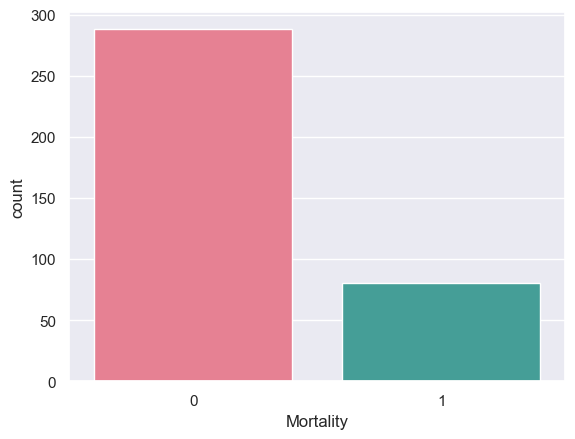

In [19]:
sns.countplot(x="Mortality", data=df, palette="husl")

Text(0.5, 1.0, 'Age and its Count')

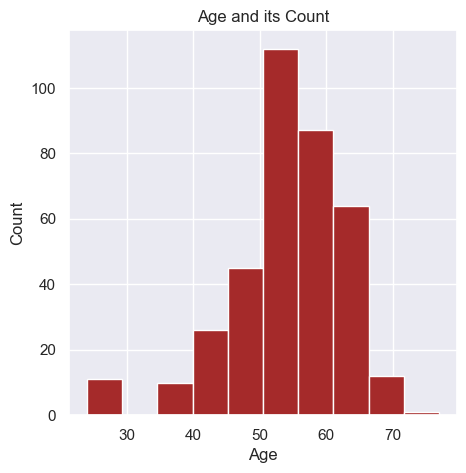

In [20]:
df['Age'].hist(figsize=(5,5), color='brown', alpha=1)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age and its Count')

Text(0.5, 1.0, 'Chol and its Count')

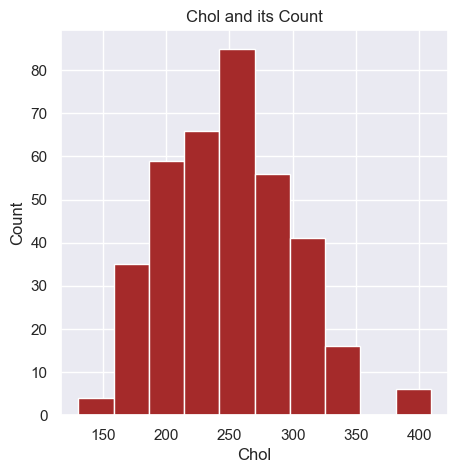

In [22]:
df['chol'].hist(figsize=(5,5), color='brown', alpha=1)
plt.xlabel('Chol')
plt.ylabel('Count')
plt.title('Chol and its Count')

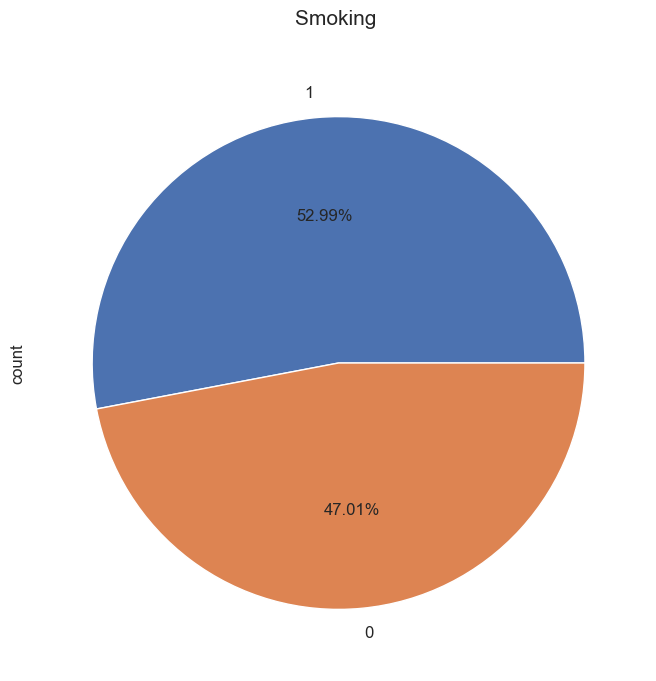

In [23]:
def piechart(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(8,8), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)

piechart(df, 'Smoking')

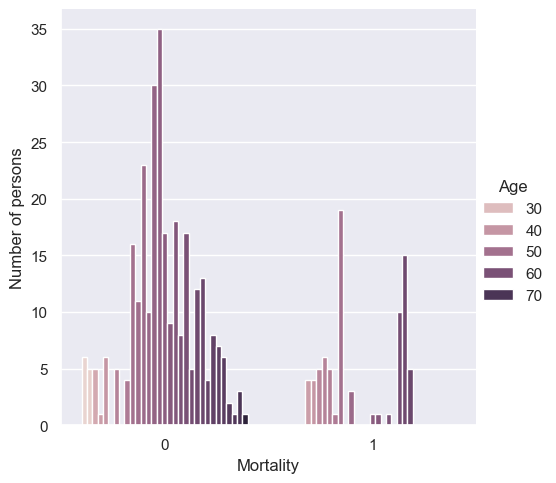

In [24]:
g = sns.catplot(x="Mortality", data=df, kind='count', hue='Age', margin_titles=False)
g.set_ylabels('Number of persons')
g.figure.set_figheight(5)

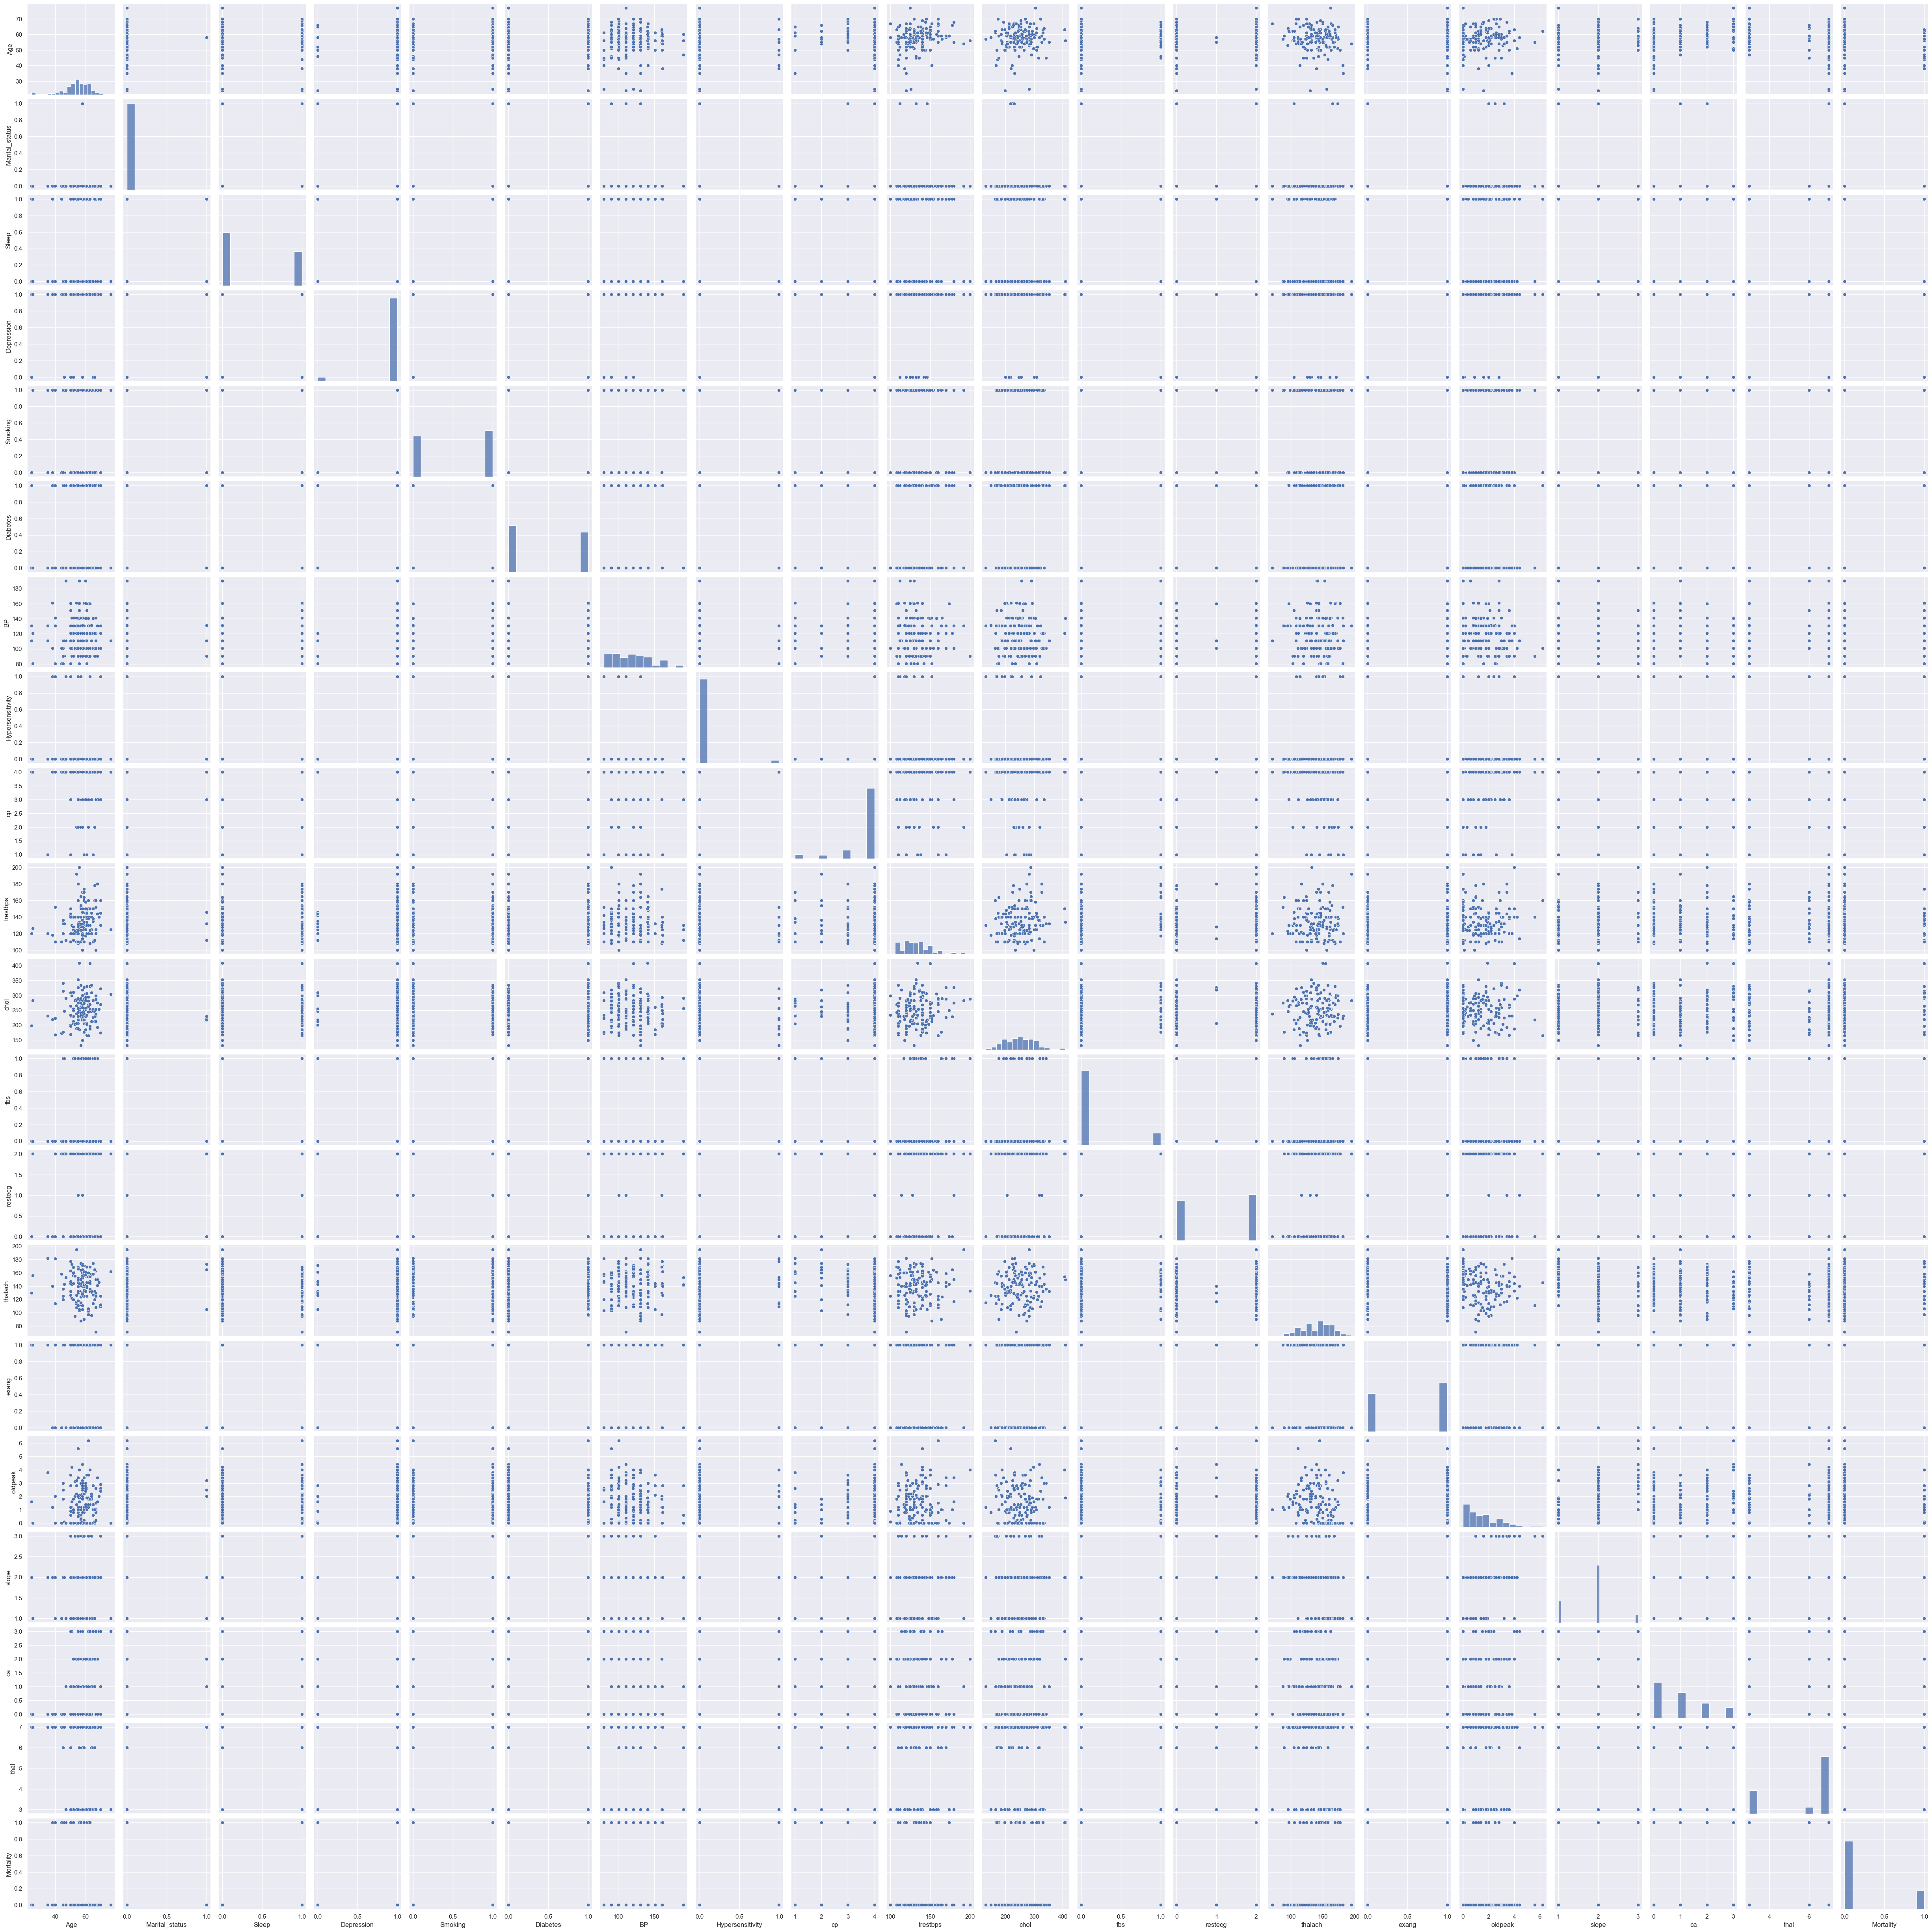

In [25]:
sns.pairplot(df)

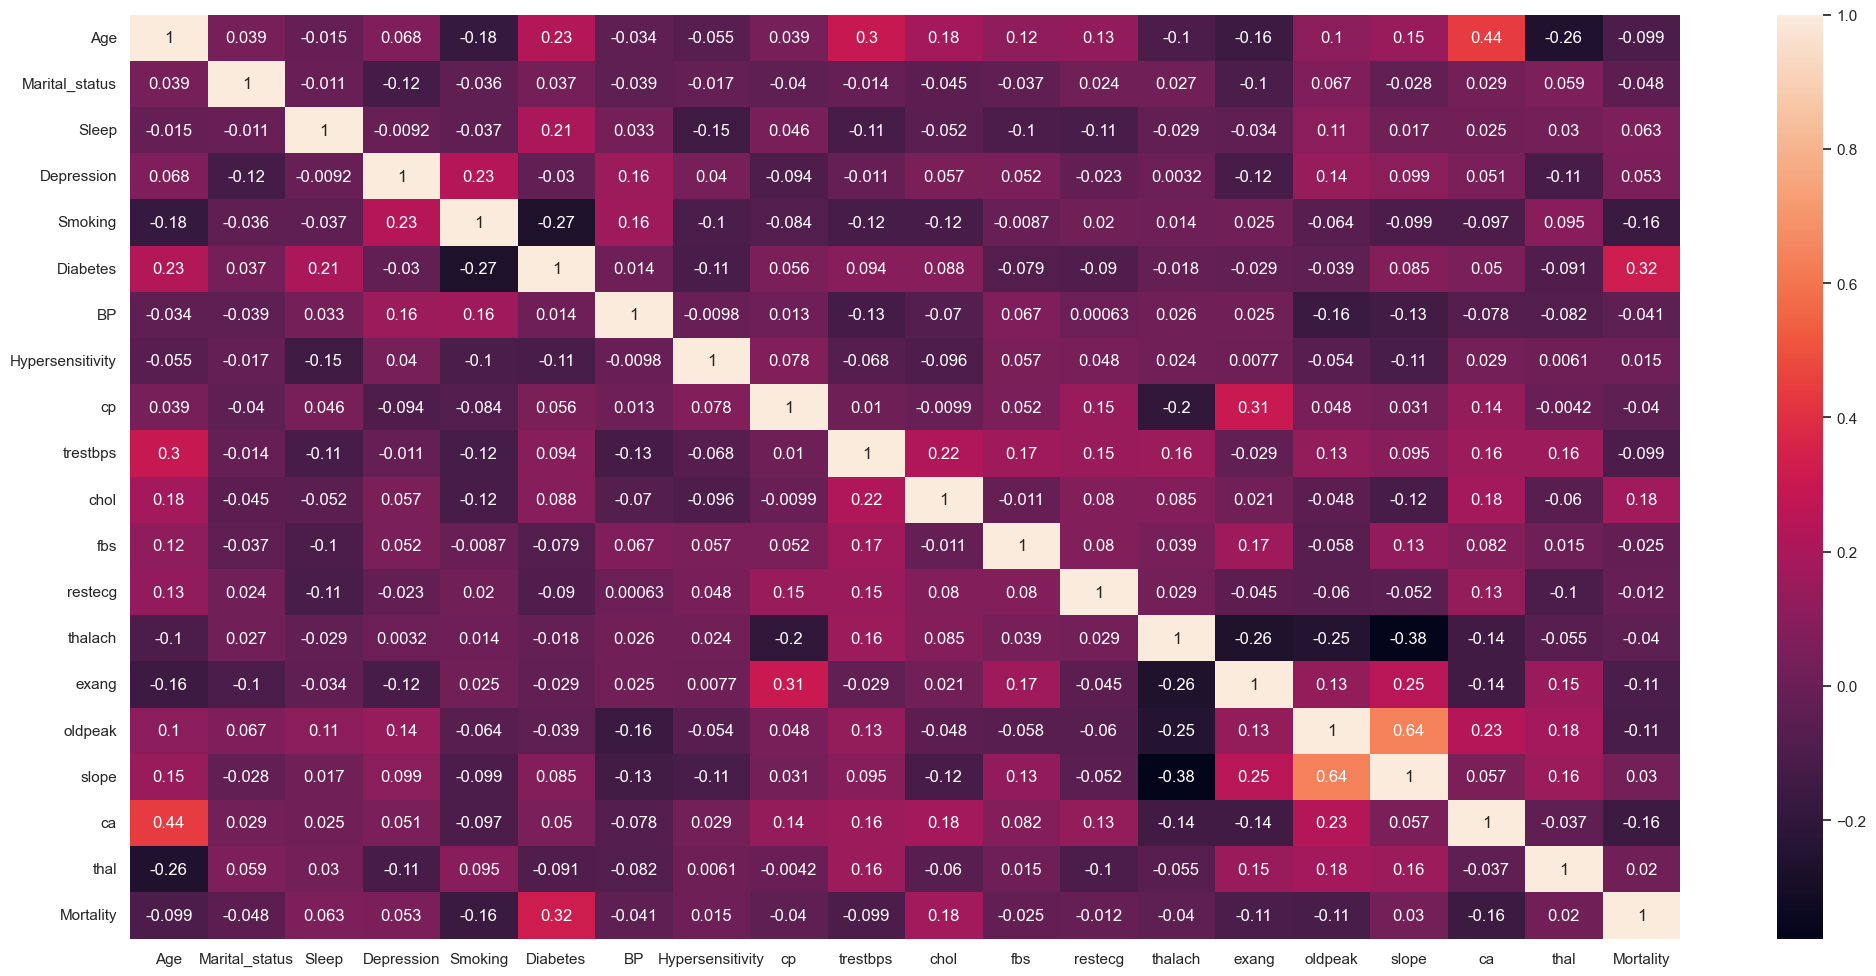

In [26]:
fig, ax = plt.subplots(figsize=(25,12))
sns.heatmap(df.corr(),annot = True, ax=ax)
plt.show()

In [28]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Mortality', axis=1)
#Response variable
Y = df.loc[:,'Mortality']  

Train-test Split

In [29]:
#Splitting for train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)
print("Number of training dataset: ", len(X_train))
print("Number of test datasefrom sklearn.model_selection import train_test_splitt: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  257
Number of test datasefrom sklearn.model_selection import train_test_splitt:  111
Total number of dataset:  368


Train data

In [30]:
X_train

,Age,Marital_status,Sleep,Depression,Smoking,Diabetes,BP,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
305,50,0,1,1,1,1,100.6,0,1,110,264,0,0,132,0,1.2,2,0,7
189,24,0,1,1,0,0,130.8,0,4,120,198,0,0,130,1,1.6,2,0,7
323,55,0,0,1,1,1,110.7,0,4,160,289,0,2,145,1,0.8,2,1,7
257,40,0,0,1,1,1,140.9,0,4,152,223,0,0,181,0,0.0,1,0,7
47,55,0,0,1,0,0,120.8,0,4,124,274,0,2,166,0,0.5,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,54,0,1,1,1,0,120.8,0,4,124,266,0,2,109,1,2.2,2,1,7
177,61,0,1,1,0,1,120.8,0,4,130,330,0,2,169,0,0.0,1,0,3
54,51,0,0,1,1,0,100.7,0,4,140,298,0,0,122,1,4.2,2,3,7
28,38,0,1,1,1,1,160.9,0,4,118,219,0,0,140,0,1.2,2,0,7


In [31]:
y_train.value_counts()

Mortality
0    201
1     56
Name: count, dtype: int64

Implementing Random forest algorithm

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test,predicted)
print('Accuracy of Random Forest Classifier',accuracy*100)

Accuracy of Random Forest Classifier 99.09909909909909


Classification Report

In [38]:
cr = classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       1.00      0.96      0.98        24

    accuracy                           0.99       111
   macro avg       0.99      0.98      0.99       111
weighted avg       0.99      0.99      0.99       111



Confusion matrix

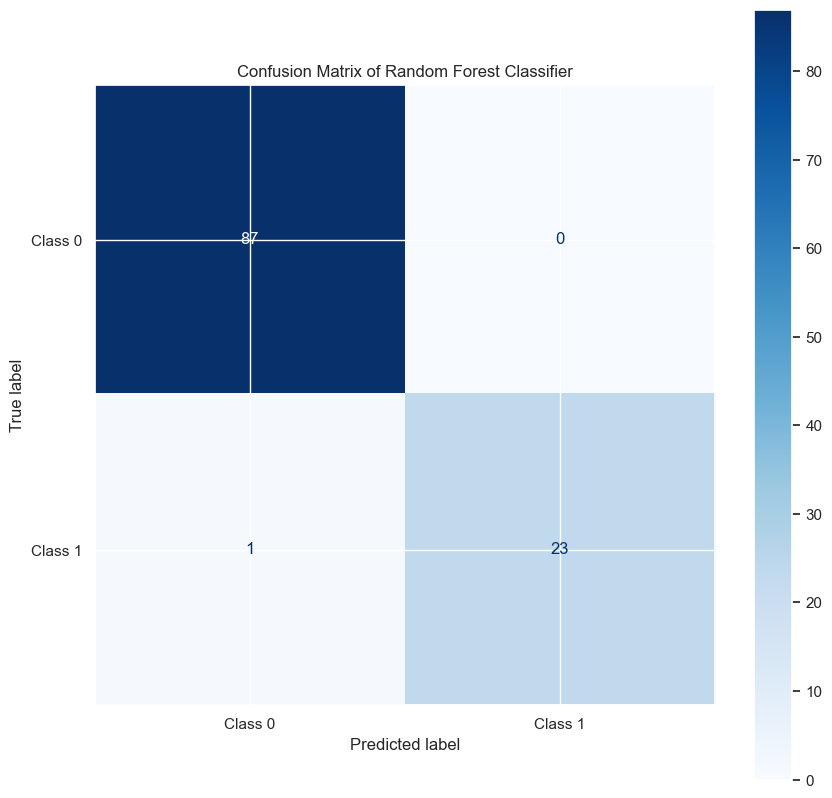

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'rf' is your trained RandomForest model
# X_test and y_test are your test features and labels
y_pred = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])  # Replace with actual class names if needed

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues')  # You can change the colormap
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()


Save Model

In [40]:

dump(rf, 'model.pkl')

['model_final.pkl']